In [ ]:
import pandas as pd

df_model = pd.read_excel('Data_monthly.xlsx', sheet_name='Data', index_col=0, parse_dates=True )
print(df_model.head())
print(df_model.tail())

             BSPS   SBER    VTBR
Date                            
2015-01-01  26.10  61.50  344.70
2015-02-01  33.25  75.91  340.00
2015-03-01  31.55  62.88  300.00
2015-04-01  36.95  76.90  327.50
2015-05-01  39.85  73.50  401.25
              BSPS    SBER   VTBR
Date                             
2024-11-01  318.31  236.49  69.50
2024-12-01  369.20  279.43  80.03
2025-01-01  373.40  280.73  83.89
2025-02-01  386.60  309.63  91.70
2025-03-01  401.95  309.72  81.96


In [ ]:
df1 = df_model['VTBR']
print(df1.head())

Date
2015-01-01    344.70
2015-02-01    340.00
2015-03-01    300.00
2015-04-01    327.50
2015-05-01    401.25
Name: VTBR, dtype: float64


In [ ]:
pip install "gluonts[torch]"

In [ ]:
pip install "gluonts[mxnet]"

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=

In [ ]:
pip install tensorboard==2.12.3

In [ ]:
pip install numpy==1.24.4

  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.
tensorflow 2.18.0 requires tensorboard<2.19,>=2.18, but you have tensorboard 2.12.3 which is incompatible.
jaxlib 0.5.1 r

In [ ]:
pip install numpy tensorboard


In [ ]:
pip install numpy==1.23.5

  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split
from gluonts.torch import DeepAREstimator


dataset = PandasDataset(df1, target="BSPS", freq="M")

# Split the data for training and testing
training_data, test_gen = split(dataset, offset=-24)
test_data = test_gen.generate_instances(prediction_length=24, windows=1)

# Train the model and make predictions

model = DeepAREstimator(
    prediction_length=24, freq="M", trainer_kwargs={"max_epochs": 5, "logger": False}
).train(training_data)

forecasts = list(model.predict(test_data.input))



/usr/local/lib/python3.11/dist-packages/gluonts/time_feature/_base.py:249: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)
/usr/local/lib/python3.11/dist-packages/gluonts/time_feature/lag.py:104: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  offset = to_offset(freq_str)
INFO: GPU available: False, used: False
INFO:lightning.pytorch.utilities.rank_zero:GPU available: False, used: False
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
/usr/local/lib/python3.11/dist-packages/light

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 50: 'train_loss' reached 5.67353 (best 5.67353), saving model to '/content/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 50: 'train_loss' reached 5.67353 (best 5.67353), saving model to '/content/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO: Epoch 1, global step 100: 'train_loss' reached 4.69904 (best 4.69904), saving model to '/content/checkpoints/epoch=1-step=100-v1.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 100: 'train_loss' reached 4.69904 (best 4.69904), saving model to '/content/checkpoints/epoch=1-step=100-v1.ckpt' as top 1
INFO: Epoch 2, global step 150: 'train_loss' reached 4.51780 (best 4.51780), saving model to '/content/checkpoints/epoch=2-step=150.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 150: 'train_loss' reached 4.51780 (best 4.51780), saving model to '/content/checkpoints/epoch=2-step=150.ckpt' as top 1
INFO:

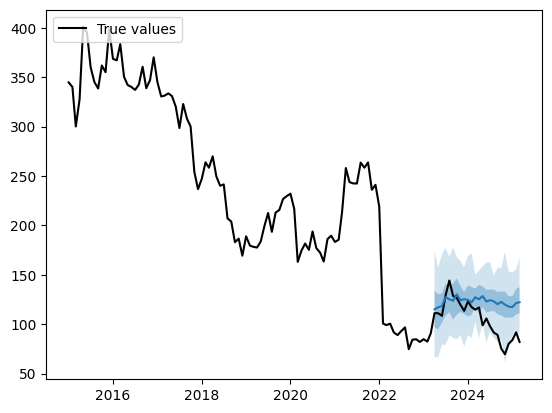

In [ ]:
# Plot predictions
plt.plot(df1, color="black")
for forecast in forecasts:
    forecast.plot()
plt.legend(["True values"], loc="upper left")
plt.show()